#### Air Passengers ####

This dataset provides monthly totals of a US airline passengers from 1949 to 1960. 

<b>Columns</b>

Month-Year : Month of the year

#Passengers : Total number of passengers travelled on that particular month.



Donwload Dataset from below given link and copy paste AirPassengers.csv file in C:\ drive and dataset folder (C:\dataset)

Link 1 :  https://raw.githubusercontent.com/sitmbadept/sitmbadept.github.io/main/BDTM/DATASET/AirPassengers.csv

Link 2 : https://drive.google.com/file/d/1NuLd9X8ekha--wD3dNHCF-Zd3ang5XrW/view?usp=sharing

In [1]:
import warnings
warnings.filterwarnings("ignore")

Reading and Displaying Data

In [2]:
import pandas as pd 
df = pd.read_csv("C:/dataset/AirPassengers.csv")

Now, let’s display the first five rows of data using the data frame head() method:

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, the dates are formatted as year–month. We also see that the data starts in the year 1949.

The second column is labeled “#Passengers,” and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data using the tail() method:

In [4]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see from this process that the data ends in 1960.

The next thing we will want to do is convert the month column into a datetime object. This will allow it to programmatically pull time values like the year or month for each record. To do this, we use the Pandas <b>to_datetime()</b> method:

In [5]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

The next thing we can do is convert the month column to a row index. This will allow us to more easily work with some of the packages we will be covering later:

In [6]:
df.index = df['Month']
del df['Month']
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


<br><br>

Next, let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. First, let’s import Matplotlib and Seaborn:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 

Next, let’s generate a line plot using Seaborn:

Text(0, 0.5, 'Number of Passengers')

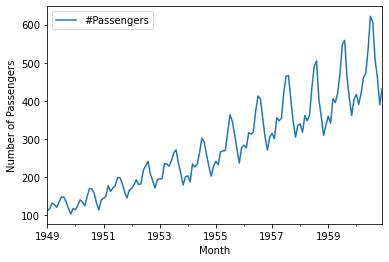

In [8]:
df.plot()
plt.ylabel("Number of Passengers")

### Stationarity ###

Stationarity is a key part of time series analysis. Simply put, stationarity means that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. You should check for stationarity because it not only makes modeling time series easier, but it is an underlying assumption in many time series methods. Specifically, stationarity is assumed for a wide variety of time series forecasting methods including autoregressive moving average (ARMA), ARIMA and Seasonal ARIMA (SARIMA).

We will use the Dickey Fuller test to check for stationarity in our data. This test will generate critical values and a p-value, which will allow us to accept or reject the null hypothesis that there is no stationarity. If we reject the null hypothesis, that means we accept the alternative, which states that there is stationarity.

These values allow us to test the degree to which present values change with past values. If there is no stationarity in the data set, a change in present values will not cause a significant change in past values.

Let’s test for stationarity in our airline passenger data. To start, let’s calculate a seven-month rolling mean:

In [9]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

Next, let’s overlay our time series with the seven-month rolling mean and seven-month rolling standard deviation. First, let’s make a Matplotlib plot of our time series:

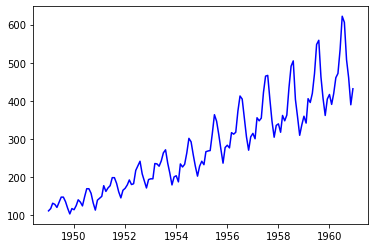

In [10]:
plt.plot(df, color="blue",label="Original Passenger Data")

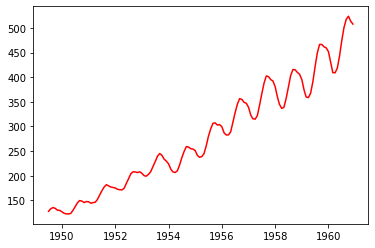

In [11]:
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")

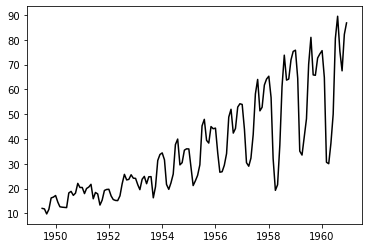

In [12]:
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")

Now combine all three graphs together to visualaize and compare it together

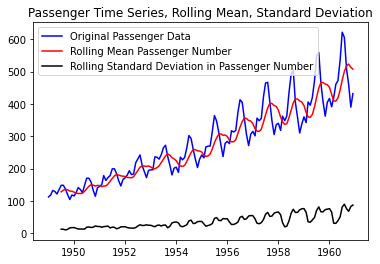

In [13]:
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

Next, let’s import the augmented Dickey-Fuller test from the statsmodels package. The documentation for the test can be found here.

In [14]:
# Install the package if you don't have it
!pip install statsmodels

In [15]:
from statsmodels.tsa.stattools import adfuller

Next, let’s pass our data frame into the adfuller method. Here, we specify the autolag parameter as “AIC,” which means that the lag is chosen to minimize the information criterion:

In [16]:
adft = adfuller(df,autolag="AIC")

Next, let’s store our results in a data frame display it:

In [17]:
output_df = pd.DataFrame({"Values":[adft[0],
                                    adft[1],
                                    adft[2],
                                    adft[3],
                                    adft[4]['1%'],
                                    adft[4]['5%'],
                                    adft[4]['10%']] ,
                          "Metric":["Test Statistics",
                                    "p-value",
                                    "No. of lags used",
                                    "Number of observations used", 
                                    "critical value (1%)",
                                    "critical value (5%)",
                                    "critical value (10%)"]})


In [18]:
output_df

,Values,Metric
0,0.815369,Test Statistics
1,0.991880,p-value
2,13.000000,No. of lags used
3,130.000000,Number of observations used
4,-3.481682,critical value (1%)
5,-2.884042,critical value (5%)
6,-2.578770,critical value (10%)


We can see that our data is not stationary from the fact that our p-value is greater than 5 percent and the test statistic is greater than the critical value. We can also draw these conclusions from inspecting the data, as we see a clear, increasing trend in the number of passengers.

### Autocorrelation ###

Checking time series data for autocorrelation in Python is another important part of the analytic process. This is a measure of how correlated time series data is at a given point in time with past values, which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.

The Pandas data frame has an autocorrelation method that we can use to calculate the autocorrelation in our passenger data. Let’s do this for a one-month lag:



In [19]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9601946480498524


Now, let’s try three, six and nine months:

In [20]:
autocorrelation_lag3 = df['#Passengers'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['#Passengers'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.8373947650817942
Six Month Lag:  0.7839187959206184
Nine Month Lag:  0.8278519011167601


We see that, even with a nine-month lag, the data is highly autocorrelated. This is further illustration of the short- and long-term trends in the data.

### Decomposition ### 

Trend decomposition is another useful way to visualize the trends in time series data. To proceed, let’s import seasonal_decompose from the statsmodels package:

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

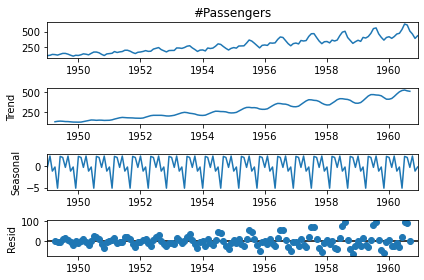

In [22]:
decompose = seasonal_decompose(df['#Passengers'],model='additive', period=7)
decompose.plot()
plt.show()

From this plot, we can clearly see the increasing trend in number of passengers and the seasonality patterns in the rise and fall in values each year.

### Forecasting ###

Time series forecasting allows us to predict future values in a time series given current and past data. Here, we will use the ARIMA method to forecast the number of passengers, which allows us to forecast future values in terms of a linear combination of past values. We will use the auto_arima package, which will allow us to forgo the time consuming process of hyperparameter tuning.

First, let’s split our data for training and testing and visualize the split:



In [23]:
df['Date'] = df.index

train = df[df['Date'] < pd.to_datetime("1960-08", format='%Y-%m')]
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']


test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']

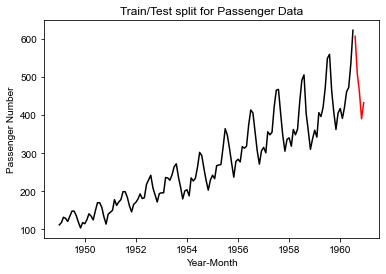

In [24]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

The black line corresponds to our training data and the red line corresponds to our test data.

Let’s import auto_arima from the pdmarima package, train our model and generate predictions:

In [25]:
# Install arima package if you don't have it
!pip install pmdarima

In [26]:
from pmdarima.arima import auto_arima

In [27]:

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

Now, let’s display the output of our model:

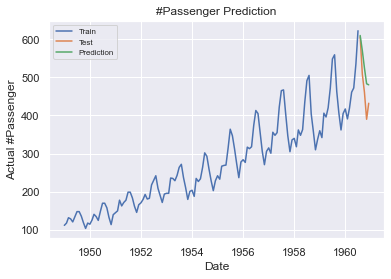

In [28]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('#Passenger Prediction')
plt.xlabel('Date')
plt.ylabel('Actual #Passenger')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Our predictions are shown in green and the actual values are shown in orange.

Finally, let’s calculate root mean squared error (RMSE):

In [29]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  61.36471559205444
